# Цель проекта

Провести анализ имеющихся данных и подготовить план действий по удержанию клиентов

# Содержание

1. [Описание данных](#the_destination1)
2. [Предобработка данных](#the_destination2)
3. [EDA](#the_destination3)
4. [Построение модели прогнозирования оттока пользователей](#the_destination4)
5. [Кластеризация пользователей](#the_destination5)
6. [Выводы и рекомендации](#the_destination6)

<a id='the_destination1'></a>

## Описание данных

'gender' — пол<br />
'Near_Location' — проживание или работа в районе, где находится фитнес-центр<br />
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)<br />
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)<br />
'Phone' — наличие контактного телефона<br />
'Age' — возраст<br />
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)<br />
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)<br />
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)<br />
'Group_visits' — факт посещения групповых занятий<br />
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента<br />
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц<br />
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

<a id='the_destination2'></a>

Предобработка данных

In [2]:
churn = pd.read_csv('/datasets/gym_churn.csv')


In [3]:
churn.head()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
churn = churn.drop_duplicates()

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 468.8 KB


Дубликатов, пропусков нет.Типы данных соблюдены

<a id='the_destination3'></a>

**EDA**

Изучим средние значения и стандартные отклонения для признаков

In [7]:
for i in churn.columns:
    print('Столбец', i)
    print(churn[i].describe())

Столбец gender
count    4000.000000
mean        0.510250
std         0.499957
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64
Столбец Near_Location
count    4000.000000
mean        0.845250
std         0.361711
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Near_Location, dtype: float64
Столбец Partner
count    4000.000000
mean        0.486750
std         0.499887
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Partner, dtype: float64
Столбец Promo_friends
count    4000.000000
mean        0.308500
std         0.461932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Promo_friends, dtype: float64
Столбец Phone
count    4000.000000
mean        0.903500
std         0.295313
min         0.000000
25%         1.000000
50%

**Почти для всех признаков отклонение не превышает среднее, либо превышает не очень сильно, поэтому можно говорить, о том что кол-во выбросов не будет очень большим**

Посмотрим на средние значения признаков в разрезе ушел в отток пользователь или нет

In [8]:
groupByChurn = churn.groupby('Churn')[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']].mean()
groupByChurn

gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.027882  
1                               1.044546

In [9]:
groupByChurnTransponent = groupByChurn.T
groupByChurnTransponent['difference'] = groupByChurnTransponent[0] / groupByChurnTransponent[1]
groupByChurnTransponent

Churn                                       0           1  difference
gender                               0.510037    0.510839    0.998431
Near_Location                        0.873086    0.768143    1.136619
Partner                              0.534195    0.355325    1.503398
Promo_friends                        0.353522    0.183789    1.923520
Phone                                0.903709    0.902922    1.000872
Contract_period                      5.747193    1.728558    3.324848
Group_visits                         0.464103    0.268615    1.727768
Age                                 29.976523   26.989632    1.110668
Avg_additional_charges_total       158.445715  115.082899    1.376796
Month_to_end_contract                5.283089    1.662582    3.177641
Lifetime                             4.711807    0.990575    4.756638
Avg_class_frequency_total            2.024876    1.474995    1.372802
Avg_class_frequency_current_month    2.027882    1.044546    1.941401

Сразу выделяется Contract_period -  для ушедших он значительно меньше. Вероятно, многие перестают пользоваться к концу абонемента. 

**Также почти в 2 раза отличаются значения для Promo_friends, Avg_class_frequency_current_month, Group_visits<br />
Для Month_to_end_contract разница более чем в 3 раза, для Lifetime - почти в 5**

Построим распределения для этих признаков

In [10]:
groupByChurn = groupByChurn.reset_index()

In [11]:
for i in groupByChurn.columns[1:]:
    fig = px.bar(groupByChurn, x='Churn', y=i, title='Гистограмма признака '+ i)
    fig.show()

**Изучим распределения на боксплотах для небинарных величин**

In [12]:
for i in churn[['Age','Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']].columns:
    fig = px.box(churn, x="Churn", y=i, points="all")
    fig.show()

**Прослеживается четкая тенденция, что в группе Churn = 1, все признаки принимают меньшие значения, чем в группе Churn = 0**

Построим матрицу корреляций

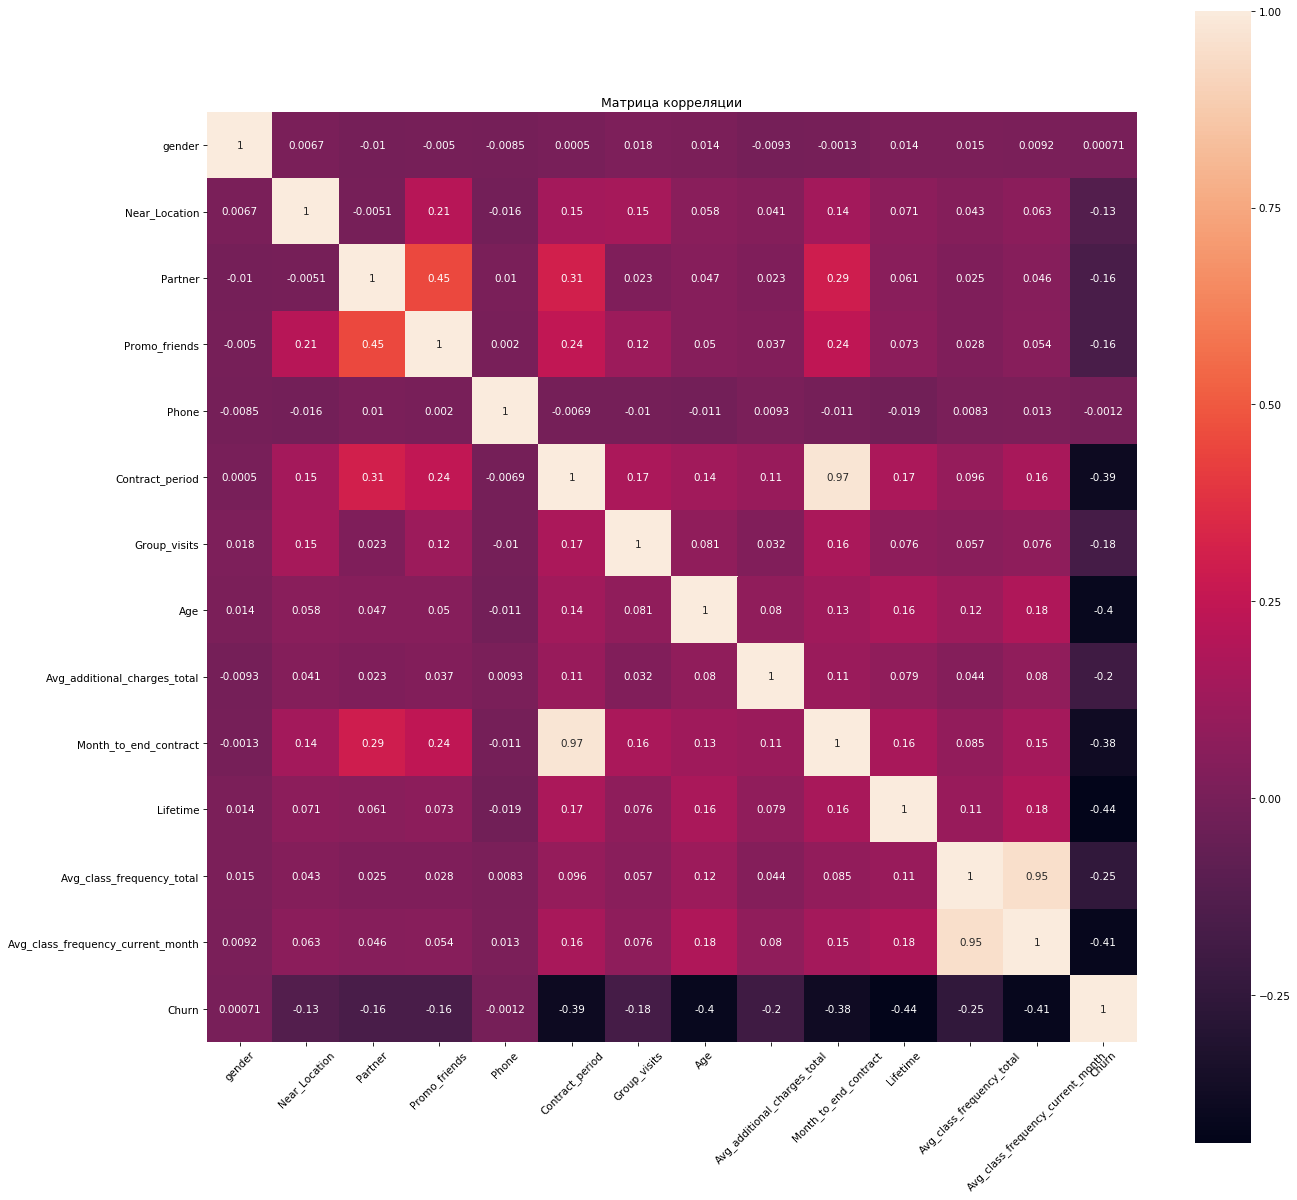

In [13]:
plt.figure(figsize=(20,20), dpi = 75)
ax = sns.heatmap(churn.corr(), annot = True, square=True)
plt.title('Матрица корреляции')
plt.xticks(rotation=45)
plt.show()

Month_to_end_contract и Contract_period сильно коррелируют. Avg_class_frequency_total и Avg_class_frequency_current_month тоже сильно коррелируют. Наша модель логистической регрессии не требует предобработки сильнокоррелирующих признаков, поэтому просто оставим так как есть

<a id='the_destination4'></a>

**Построение модели прогнозирования оттока пользователей**

Разобьем данные на обучающую и валидационную выборку, обучим модель методами LogisticRegression и RandomForestClassifier. Сравним значения метрик для обоих случаев

In [14]:
X = churn.drop(columns = ['Churn'])
y = churn['Churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [16]:
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [17]:
accuracy_score(y_test, predictions)

0.92375

In [18]:
precision_score(y_test, predictions)

0.8895027624309392

In [19]:
recall_score(y_test, predictions)

0.7970297029702971

In [20]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [21]:
accuracy_score(y_test, predictions)

0.8975

In [22]:
precision_score(y_test, predictions)

0.8614457831325302

In [23]:
recall_score(y_test, predictions)

0.7079207920792079

LogisticRegression - наш выбор

<a id='the_destination5'></a>

**Кластеризация пользователей**

Проведем кластеризацию методом KMeans, предварительно оценив кол-во кластеров с помощью дендрограммы

In [24]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(X)

In [25]:
linked = linkage(x_sc, method = 'ward')

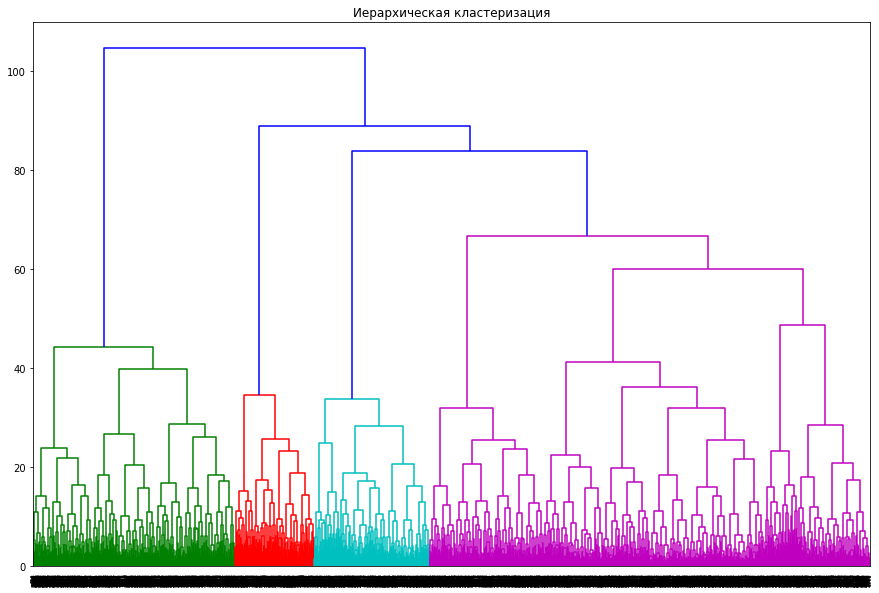

In [26]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

4 цвета - значит задаем 4 кластера для K-means, но т.к. по условию просят 5, то зададим 5

In [27]:
km = KMeans(n_clusters = 5, random_state = 42)
labels = km.fit_predict(x_sc)

In [28]:
labels

array([4, 2, 3, ..., 2, 0, 4], dtype=int32)

In [29]:
X['cluster'] = pd.Series(labels)
X

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...            ...      ...            ...    ...              ...   
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0                1   29                     14.227470                    5.0   
1                1   31                    113.202938                   12.0   
2                0   28                    129.448479                    1.0   
3                1   33                     62.669863                   12.0   
4                0   26                    198.362265                    1.0   
...            ...  ...                           ...                    ...   
3995             0   33                      2.406023                   12.0   
3996             1   29                     68.883764                    1.0   
3997             0   28                     78.250542                   11.0   
3998             0   32                     61.912657                    5.0   
3999             1   30                    178.861814                   12.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0            3                   0.020398                           0.000000   
1            7                   1.922936                           1.910244   
2            2                   1.859098                           1.736502   
3            2                   3.205633                           3.357215   
4            3                   1.113884                           1.120078   
...        ...                        ...                                ...   
3995         8                   2.284497                           2.349070   
3996         1                   1.277168                           0.292859   
3997         2                   2.786146                           2.831439   
3998         3                   1.630108                           1.596237   
3999         1                   1.101832                           1.035270   

      cluster  
0           4  
1           2  
2           3  
3           2  
4           0  
...       ...  
3995        2  
3996        3  
3997        2  
3998        0  
3999        4  

[4000 rows x 14 columns]

Найдем средние значения признаков для кластеров

In [30]:
attByCluster = X.groupby('cluster')[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',]].mean()
attByCluster

gender  Near_Location   Partner  Promo_friends  Phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                                                  
0                          141.774331               2.887836  3.772512   
1                          159.774265               2.419573  4.780652   
2                          163.509804              10.812717  4.677457   
3                          129.496414               1.821516  2.195599   
4                          144.208179               4.466321  3.940415   

         Avg_class_frequency_total  Avg_class_frequency_current_month  
cluster                                                                
0                         1.770536                           1.669581  
1                         2.745505                           2.733173  
2                         2.006405                           1.998179  
3                         1.225192                           0.967967  
4                         1.854211                           1.723967

Построим распределения признаков по кластерам

In [31]:
attByCluster = attByCluster.reset_index()
attByCluster

cluster    gender  Near_Location   Partner  Promo_friends  Phone  \
0        0  0.502370       0.949447  0.829384       0.998420    1.0   
1        1  0.554556       0.849269  0.263217       0.052868    1.0   
2        2  0.499422       0.937572  0.737572       0.478613    1.0   
3        3  0.485738       0.718011  0.299919       0.018745    1.0   
4        4  0.523316       0.862694  0.471503       0.305699    0.0   

   Contract_period  Group_visits        Age  Avg_additional_charges_total  \
0         3.097946      0.448657  29.104265                    141.774331   
1         2.606299      0.436445  30.008999                    159.774265   
2        11.854335      0.546821  29.905202                    163.509804   
3         1.914425      0.276284  28.083945                    129.496414   
4         4.777202      0.427461  29.297927                    144.208179   

   Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
0               2.887836  3.772512                   1.770536   
1               2.419573  4.780652                   2.745505   
2              10.812717  4.677457                   2.006405   
3               1.821516  2.195599                   1.225192   
4               4.466321  3.940415                   1.854211   

   Avg_class_frequency_current_month  
0                           1.669581  
1                           2.733173  
2                           1.998179  
3                           0.967967  
4                           1.723967

In [32]:
for i in attByCluster.columns[1:]:
    fig = px.bar(attByCluster, x='cluster', y=i, title='Гистограмма признака '+ i)
    fig.show()

Для признака Partner - 0,2 кластеры превалируют(>73%), 1 и 3 менее 30%<br />
Для признака Promo_friends - 0 кластер достигает 99%, 2 и 4 лежат в пределах 30-50%, а 1 и 3 почти отсутствуют  <br />
Для признака Phone - полностью отсутствует 4 кластер <br />
Для признака Contract_period - 2 кластер достигает среднего значения 11,8 месяца, остальные кластеры менее 5 <br />
Для признака Month_to_end_contract - сохраняется такая же картина как и для Contract_period  <br />
Для признаков Lifetime, Avg_class_frequency_total и  Avg_class_frequency_current_month - лидером является 1 и 2 кластеры, а 3 кластер значительно проседает <br />

**Дополнительно посмотрим распределения на боксплотах для небинарных величин**

In [33]:
for i in X[['Age','Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']].columns:
    fig = px.box(X, x="cluster", y=i, points="all")
    fig.show()
    

**Для признака Month_to_end_contract сильно лидирует 2 кластер, а 3 кластер почти отсутствует<br />
Для признака Lifetime 1 и 2 кластеры в лидерах, а 3 проседает<br />
Схожая картина и для Avg_class_frequency_total и Avg_class_frequency_current_month, но здесь 1 кластер выделяется в большую сторону**

In [34]:
churn['cluster'] = X['cluster']
churn

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...            ...      ...            ...    ...              ...   
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0                1   29                     14.227470                    5.0   
1                1   31                    113.202938                   12.0   
2                0   28                    129.448479                    1.0   
3                1   33                     62.669863                   12.0   
4                0   26                    198.362265                    1.0   
...            ...  ...                           ...                    ...   
3995             0   33                      2.406023                   12.0   
3996             1   29                     68.883764                    1.0   
3997             0   28                     78.250542                   11.0   
3998             0   32                     61.912657                    5.0   
3999             1   30                    178.861814                   12.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0            3                   0.020398                           0.000000   
1            7                   1.922936                           1.910244   
2            2                   1.859098                           1.736502   
3            2                   3.205633                           3.357215   
4            3                   1.113884                           1.120078   
...        ...                        ...                                ...   
3995         8                   2.284497                           2.349070   
3996         1                   1.277168                           0.292859   
3997         2                   2.786146                           2.831439   
3998         3                   1.630108                           1.596237   
3999         1                   1.101832                           1.035270   

      Churn  cluster  
0         0        4  
1         0        2  
2         0        3  
3         0        2  
4         0        0  
...     ...      ...  
3995      0        2  
3996      1        3  
3997      0        2  
3998      0        0  
3999      0        4  

[4000 rows x 15 columns]

In [35]:
churn.groupby('cluster')['Churn'].mean().sort_values(ascending=False)

cluster
3    0.572942
4    0.266839
0    0.246445
1    0.089989
2    0.021965
Name: Churn, dtype: float64

В 3 кластере отток составляет 58%, в то время как в 1 и 2 колеблется в пределах 2-8%

<a id='the_destination6'></a>

# Общие выводы

Исходя, из полученных данных о кол-во оттока в кластерах, мы хотим увеличить долю пользователей, относящихся к 1 и 2 кластерам и свести к минимуму 3 кластер.<br />
При изучении распределения признаков по кластерам, мы выяснили, что для признаков Lifetime, Avg_class_frequency_total и  Avg_class_frequency_current_month - лидером является 1 и 2 кластеры, а 3 кластер значительно проседает. Соответственно, для достижения сформулированных целей надо добиться максимизации этих признаков.<br />
Таким образом, нам надо провести маркетинговую кампанию нацеленную на пользователей с временем с момента первого обращения в фитнес-центр менее 3 месяцев, средней частотой посещений в неделю за все время с начала действия абонемента менее 1.5 раз, средней частотой посещений в неделю за предыдущий месяц менее 1 раза. Эта группа пользователей является наиболее вероятной для оттока.